**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be graded  on a 0-4 scale, following the standard NJIT convention (A:4, B+: 3.5, B:3, C+: 2.5, C: 2, D:1, F:0). 
The total score must be re-scaled to 100 -- that should apply to all future assignments so that Canvas assigns the same weight on all assignments. 



In [ ]:
# Grader's area
import numpy as np
M = np.zeros([10,10])
maxScore = 0


# **Assignment 3**

The goal in this assignment to work a little more with Python, do some practice with logistic regression, reflect on how it can fail to work on linearly separable data. You will also work with a support vector classifier. All that, still on "toy" data sets. 

We will work with the first 'real' data sets in the next assignment. 

## **Preparation Steps**

In [ ]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression

In [ ]:
# ### Reading-in the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


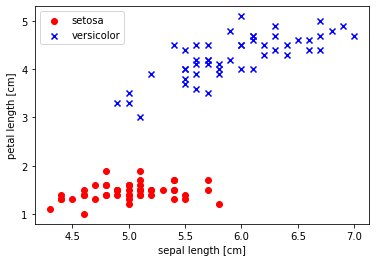

In [ ]:
# select setosa and versicolor for binary classification
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [ ]:
# function for visualizing decision regions

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

-----------------------
-----------------------
-----------------------


## <font color = 'blue'> **Question 1. Practice with logistic regression** </font>

Let's first load the textbook's implementation of logistic regression with gradient descent.

In [ ]:
class LogisticRegressionGD(object):
    """Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    loss_ : list
      Logistic loss function value in each epoch.

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.loss_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # compute the logistic `loss` 
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.loss_.append(loss)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # equivalent to:
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Below you can see the first 3 data points of the data set, all labeled as 'setosa'. Let's set the numerical value for 'setosa' to 1. (i.e. y = 1). 

In [ ]:
X[0:3]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3]])


Suppose the initial weights of the logistic neuron are w0=0.1, w1=-0.2, w2=0.1

<font color = 'blue'> **Q1-1**.  </font> Write the weights after processing data points 0,1,2, with learning rate $\eta=0.1$ and show your calculations. This is similar to the previous assignment, only done now for the logistic neuron. You can also use *LogisticRegressionGD* to check your calculations. <br>

<font color = 'blue'> **Q1-2**.  </font> Given our data $X$, let $X_{d=2}$ and $X_{d=3}$ be the quadratic and cubic features. Using code from the notebook on polynomial regression, generate $X_{d=2}$ and $X_{d=3}$

<font color = 'blue'> **Q1-3**.  </font> Using *LogisticRegressionGD* fit $X$, $X_{d=2}$ and $X_{d=3}$. Here you should set $\eta = 0.1$ and $n_{iter}>1000$. For each of these three cases, report the loss function value for the model computed by *LogisticRegressionGD*.
Here it is expected that the loss value decreases as $d$ increases. 


In [ ]:
input_ = np.dot(X1, initial_weights[1:]) + initial_weights[0]
print(input_)

[-0.78 -0.74 -0.71]


In [ ]:
## sigmoid activation
output_ = 1. / (1. + np.exp(-np.clip(input_, -250, 250)))
print(output_)

[0.31431989 0.32300414 0.32959884]


In [ ]:
## Errors
err_ = y1 - output_
print(err_)

initial_weights[1:] += eta * X1.T.dot(err_)
initial_weights[0]  += eta * err_.sum()

[-1.31431989 -1.32300414 -1.32959884]


In [ ]:
### Weights after first iteration
print(initial_weights)


[-0.2966922870014356, -2.1434866272244464, -0.4420732134000984]


Q 1.2 Solution

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X2 = PolynomialFeatures(2).fit_transform(X)
X3 = PolynomialFeatures(3).fit_transform(X)
print(X2)

[[ 1.    5.1   1.4  26.01  7.14  1.96]
 [ 1.    4.9   1.4  24.01  6.86  1.96]
 [ 1.    4.7   1.3  22.09  6.11  1.69]
 [ 1.    4.6   1.5  21.16  6.9   2.25]
 [ 1.    5.    1.4  25.    7.    1.96]
 [ 1.    5.4   1.7  29.16  9.18  2.89]
 [ 1.    4.6   1.4  21.16  6.44  1.96]
 [ 1.    5.    1.5  25.    7.5   2.25]
 [ 1.    4.4   1.4  19.36  6.16  1.96]
 [ 1.    4.9   1.5  24.01  7.35  2.25]
 [ 1.    5.4   1.5  29.16  8.1   2.25]
 [ 1.    4.8   1.6  23.04  7.68  2.56]
 [ 1.    4.8   1.4  23.04  6.72  1.96]
 [ 1.    4.3   1.1  18.49  4.73  1.21]
 [ 1.    5.8   1.2  33.64  6.96  1.44]
 [ 1.    5.7   1.5  32.49  8.55  2.25]
 [ 1.    5.4   1.3  29.16  7.02  1.69]
 [ 1.    5.1   1.4  26.01  7.14  1.96]
 [ 1.    5.7   1.7  32.49  9.69  2.89]
 [ 1.    5.1   1.5  26.01  7.65  2.25]
 [ 1.    5.4   1.7  29.16  9.18  2.89]
 [ 1.    5.1   1.5  26.01  7.65  2.25]
 [ 1.    4.6   1.   21.16  4.6   1.  ]
 [ 1.    5.1   1.7  26.01  8.67  2.89]
 [ 1.    4.8   1.9  23.04  9.12  3.61]
 [ 1.    5.    1.6  25.  

In [ ]:
print(X3)

[[  1.      5.1     1.4    26.01    7.14    1.96  132.651  36.414   9.996
    2.744]
 [  1.      4.9     1.4    24.01    6.86    1.96  117.649  33.614   9.604
    2.744]
 [  1.      4.7     1.3    22.09    6.11    1.69  103.823  28.717   7.943
    2.197]
 [  1.      4.6     1.5    21.16    6.9     2.25   97.336  31.74   10.35
    3.375]
 [  1.      5.      1.4    25.      7.      1.96  125.     35.      9.8
    2.744]
 [  1.      5.4     1.7    29.16    9.18    2.89  157.464  49.572  15.606
    4.913]
 [  1.      4.6     1.4    21.16    6.44    1.96   97.336  29.624   9.016
    2.744]
 [  1.      5.      1.5    25.      7.5     2.25  125.     37.5    11.25
    3.375]
 [  1.      4.4     1.4    19.36    6.16    1.96   85.184  27.104   8.624
    2.744]
 [  1.      4.9     1.5    24.01    7.35    2.25  117.649  36.015  11.025
    3.375]
 [  1.      5.4     1.5    29.16    8.1     2.25  157.464  43.74   12.15
    3.375]
 [  1.      4.8     1.6    23.04    7.68    2.56  110.592  36.864  12.

1 1.3 Solution

In [ ]:
modl_X = LogisticRegressionGD(eta=0.1, n_iter=1100, random_state=10).fit(X, y)
loss_X = modl_X.loss_
weights_X = modl_X.w_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log


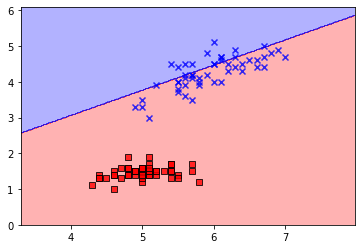

In [ ]:
plot_decision_regions(X=X, y=y, classifier=modl_X)

In [ ]:
modl_X2 = LogisticRegressionGD(eta=0.1, n_iter=1050, random_state=1).fit(X2, y)
loss_X2 = modl_X2.loss_
weights_X2 = modl_X2.w_


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log


In [ ]:
modl_X3 = LogisticRegressionGD(eta=0.1, n_iter=1020, random_state=1).fit(X3, y)
loss_X3 = modl_X3.loss_
weights_X3 = modl_X3.w_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log


In [ ]:
print("Loss for X = ", abs(np.nanmean(loss_X)))
print("\nLoss for X2 = ", abs(np.nanmean(loss_X2)))
print("\nLoss for X3 = ", abs(np.nanmean(loss_X3)))


Loss for X =  3764.2100567340385

Loss for X2 =  14.816810430178773

Loss for X3 =  11.293616159407442



Here, we can clearly observe the loss function value decrease as we increase the value of d,
i.e,
loss_X[0] > loss_X2[0] > loss_X3[0]


In [ ]:
# Grader's area

maxScore = maxScore +12
#M[1,1] = 
#M[1,2] = 
#M[1,3] =

NameError: ignored

-----------------------
-----------------------
-----------------------


## <font color = 'blue'> **Question 2. A theoretical question** </font>

This question is about a theoretical explanation for what you observed in question 1(iii). 

<br>

Suppose $f_1$ is a model that optimally fits the data $(X,y)$, and $f_2$ is another model that optimally fits the data $(X_2,y)$ where $X_2$ are the quadratic features of $X$. Then the loss function value obtained by $f_2$ is **always** going to be at least equal to that for $f_1$. Try to come up with a solid mathematical argument that justifies this claim. [Note: as with anything else, feel free to discuss this on Canvas]



```
# This is formatted as code
```

Assuming data X is of the form [a, b], the second-degreee quadratic polynomial 
features for X would be [1, a, b, a^2, ab, b^2]. 
Loss funtion is generally a lower value if the number of correct predictions are higher. 
That is if the number of TruePositives (TP) and FalseNegatives(FN) are higher. If the model has more 
False Positives and True Negatives, the loss function value gets higher. 
Inorder to get more right predictions, the new columns added must provide better correlations to the outcome y, in a way the 
data is more separable. 
The additional features generated in a quadratic feature X2 scenario are (a^2, ab, b^2).
For example, if the model f is a linear classifier. (a,b) features in X are correlated to help developing a linear classifier, then
a^2, b^2 also will be correlated. However feature 'ab' might add more variance into the model reducing the models capacity to make
more accurate predictions leading to a larger loss function. 
If the model under consideration is a decision tree based algorithm, then feature 'ab' might be given very less weight (importance),
and hence it might not make a difference in prediction capabilities if 'ab' is not correlated and hence the loss function might be 
equal to X.
if the newly generated feature 'ab' reduces bias and is a more correlated with the outcomes leading to a better classifier, then the 
resultant loss function f1 (with data X2) will be lesser than f (with data X). 
In conclusion, the loss function difference depends on the model being used and the inherent nature of the data. Depending 
on what kind of variance the quadratic features add in the classification/regression problem, the loss function could be same, higher or lower 
compared to the loss function using raw X data.

In [ ]:
# Grader's area

maxScore = maxScore + 4
#M[2,1] = 


-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 3. Logistic Regression: How 'unfair' can it be?**  </font>

We have seen that the inductive bias of an SVC guarantees that when the dataset is linearly separable, SVC will return a hyperplane that is at exactly the same distance from the two classes.  But what about logistic regression? Can we guarantee that it can also be at least partially fair?

The answer is **negative**. We can  demonstrate how logistic regression can be 'unfair' by constructing a dataset with the properties that: <br> 

**a.** the data set is linearly separable  <br>
**b.** the optimal logistic regression model corresponds to a hyperplane that nearly 'touches' one of the two classes, i.e. it gives a very big margin to the one of the two classes and very small margin for the other class.  <br>

Demonstrate your answer as follows: <br>

<font color = 'blue'> **Q3-1**.  </font>
 Plot the data points, as we did above for the iris data set. This will show that your data set is linearly separable. <br>
<font color = 'blue'> **Q3-2**.  </font> Calculate the optimal logistic neuron weights using the function *LogisticRegressionGD* from question 1. <br>
<font color = 'blue'> **Q3-3**. </font>  Plot the decision regions to demonstrate how the learned separation line is unfair. 

**Hint**: Try small datasets.
**Note**: It's best to use fresh variables for your dataset, because the previous $X,y$ are re-used in question 4.


In [ ]:
# your answers go here

Q 3.1 Solution


In [ ]:
## creating our own linearly separable data 
import matplotlib.pyplot as plt
from sklearn import datasets

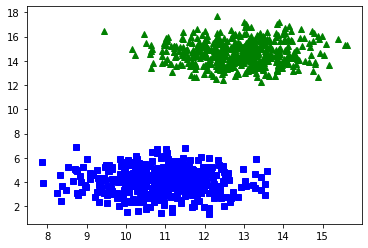

In [ ]:
X, y = datasets.make_blobs(n_samples=1000, centers=2, n_features=2, center_box=(0, 20))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

Q 3.2 Solution

In [ ]:
modl_X_new = LogisticRegressionGD(eta=0.1, n_iter=1050, random_state=1).fit(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log


In [ ]:
### weights for the above data are as below
print("Optimal Weights for the above Logistic Neuron Model are =",  modl_X_new.w_)


Optimal Weights for the above Logistic Neuron Model are = [  52.76693373  433.22067814 -557.06607534]


Q 3.3 Solution

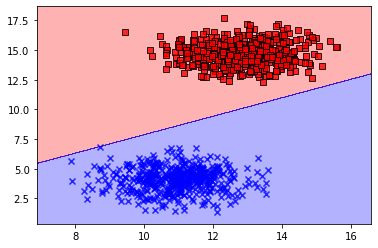

In [ ]:
plot_decision_regions(X=X, y=y, classifier=modl_X_new)

    Here we are clearly able to recognize that the hyperplane separating the 2 classes is almost touching one class
    and leaves out a large margin on the other class. 
    
    Now lets try using sklearn logistic regression package to see if adjusting 'C' solves this issue.

In [ ]:
# Grader's area

maxScore = maxScore + 12
#M[3,1] = 
#M[3,2] = 
#M[3,3] = 


<font color = 'blue'> **Q3-4**.  </font> The standard scikit-learn implementation of logistic regression uses regularization by default ($C=1$).  Can you come up with a linearly separable dataset that makes that **default** implementation fail? <br>

[Note: This is an experimental question. You should be able to use the example from above, or modify it, and make the default implementation fail.]

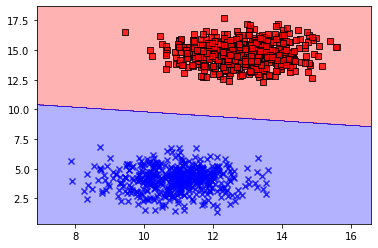

In [ ]:
from sklearn.linear_model import LogisticRegression
modl_sklearn_LR = LogisticRegression(C = 3).fit(X, y)
plot_decision_regions(X=X, y=y, classifier=modl_sklearn_LR)


Here we can observe that adjusting C=3 creates a middle hyperplane thats almost equidistant from both classes. 

In [ ]:
# Grader's area
maxScore = maxScore + 4

# M[3,4] = 

-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 4. SVC and classification margin**  </font>

The Iris dataset defined in above cells is linearly separable. 

<font color = 'blue'> **Q4-1.**  </font> Use a [linear SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) to learn a hyperplane $y=w_1x_1 +w_2x_2 +b$ that maximizes the margin for this Iris dataset. In your answer, specify a setting for the hyperparameter $C$ that reduces the amount of regularization, i.e. it incentivizes very small slacks.

<font color = 'blue'> **Q4-2.** </font> Extract the coefficients $w$ and the intercept $b$ from the learned SVC. Find the the 2-norm of $w$, $s = ||w||_2$.
[Hint: Read the documentation in order to access the coefficients] 

<font color = 'blue'> **Q4-3.** </font> Set $w = w/s$ and $b=b/s$. This changes the numerical definition of the separation line, but the line is still the same.  

<font color = 'blue'> **Q4-4.** </font> With the new $w$ and $b$, calculate $wx^T - b$ for each point $x$ in our dataset. This will give a range of values, let $\gamma$ be the smallest one in absolute value. This $\gamma$ is the margin (in fact there should be two points $x_1$ and $x_2$ of different labels, that give $wx_1^T - b = \gamma$ and $wx_1^T - b = -\gamma$). 


**Note:** as with anything else, feel free to discuss this on Canvas.

Q 4.1 Solution

In [ ]:
### Reading IRIS data again
# select setosa and versicolor for binary classification
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


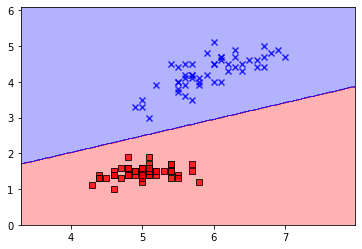

In [ ]:
from sklearn.svm import LinearSVC

modl_linearSVC = LinearSVC(C = 2).fit(X, y)
plot_decision_regions(X=X, y=y, classifier=modl_linearSVC)


Q 4.2 Solution

In [ ]:
## weights
modl_linearSVC.coef_

array([[-0.64405774,  1.38579171]])

In [ ]:
## Intercept
modl_linearSVC.intercept_

array([-0.22156523])

Hence, the hyperplane equation is as follows:
    y = -0.644x1 + 1.3857x2 - 0.221

In [ ]:
## Finding 2-norm of the above weights
intercept_SVC = modl_linearSVC.intercept_
weights_SVC = modl_linearSVC.coef_
norm2 = np.linalg.norm(weights_SVC, ord = 2)
print("2-norm s = ", norm2)


2-norm s =  1.5281456170187526


Q 4.3 Solution

In [ ]:
weights_SVC1 = weights_SVC/norm2
intercept_SVC1 = intercept_SVC/norm2
intercept_SVC1 = intercept_SVC1[0]
print("weights= ",weights_SVC1)
print("intercept= ",intercept_SVC1)


weights=  [[-0.42146359  0.90684532]]
intercept=  -0.14498960658818805


Q 4.4 Soltuion

In [ ]:
## apply w1x1T - b for datapoints in first column, and w2x2T-b for all elements in second column

X_1 = list(X[:, 0]) ## first column  
X_2 = list(X[:, 1]) ## other column

gamma1 = [weights_SVC1[0][0]*x - intercept_SVC1 for x in X_1]
print(gamma1)

[-2.00447469677308, -1.920181978994207, -1.8358892612153337, -1.7937429023258966, -1.9623283378836436, -2.13091377344139, -1.7937429023258966, -1.9623283378836436, -1.7094501845470238, -1.920181978994207, -2.13091377344139, -1.8780356201047703, -1.8780356201047703, -1.6673038256575872, -2.2994992089991366, -2.2573528501097, -2.13091377344139, -2.00447469677308, -2.2573528501097, -2.00447469677308, -2.13091377344139, -2.00447469677308, -1.7937429023258966, -2.00447469677308, -1.8780356201047703, -1.9623283378836436, -1.9623283378836436, -2.046621055662517, -2.046621055662517, -1.8358892612153337, -1.8780356201047703, -2.13091377344139, -2.046621055662517, -2.1730601323308267, -1.920181978994207, -1.9623283378836436, -2.1730601323308267, -1.920181978994207, -1.7094501845470238, -2.00447469677308, -1.9623283378836436, -1.7515965434364604, -1.7094501845470238, -1.9623283378836436, -2.00447469677308, -1.8780356201047703, -2.00447469677308, -1.7937429023258966, -2.0887674145519535, -1.962328

In [ ]:
print(min(gamma1))

-2.805255515672376


In [ ]:
gamma2 = [weights_SVC1[0][1]*x - intercept_SVC1 for x in X_2]
print(gamma2)

[1.4145730614044165, 1.4145730614044165, 1.3238885289175433, 1.5052575938912898, 1.4145730614044165, 1.6866266588650367, 1.4145730614044165, 1.5052575938912898, 1.4145730614044165, 1.5052575938912898, 1.5052575938912898, 1.5959421263781635, 1.4145730614044165, 1.1425194639437963, 1.2332039964306696, 1.5052575938912898, 1.3238885289175433, 1.4145730614044165, 1.6866266588650367, 1.5052575938912898, 1.6866266588650367, 1.5052575938912898, 1.0518349314569226, 1.6866266588650367, 1.8679957238387837, 1.5959421263781635, 1.5959421263781635, 1.5052575938912898, 1.4145730614044165, 1.5959421263781635, 1.5959421263781635, 1.5052575938912898, 1.5052575938912898, 1.4145730614044165, 1.5052575938912898, 1.2332039964306696, 1.3238885289175433, 1.5052575938912898, 1.3238885289175433, 1.5052575938912898, 1.3238885289175433, 1.3238885289175433, 1.3238885289175433, 1.5959421263781635, 1.8679957238387837, 1.4145730614044165, 1.5959421263781635, 1.4145730614044165, 1.5052575938912898, 1.4145730614044165,

In [ ]:
print(min(gamma2))

1.0518349314569226


In [ ]:
### least absolute value
gamma1_least_abs = abs(min(gamma1))
gamma1_least_abs

2.805255515672376

In [ ]:
gamma2_least_abs = abs(min(gamma2))
gamma2_least_abs


1.0518349314569226

In [ ]:
# Grader's area

maxScore = maxScore + 16
#M[4,1] = 
#M[4,2] = 
#M[4,3] = 
#M[4,4] = 


-----------------------
-----------------------
-----------------------


##  <font color = 'blue'> **Question 5. Upper bound for perceptron errors before convergence**  </font>

In this problem we will use $\gamma$ calculated in question 4. If you have not been able to calculate it, you can 'borrow' its value from someone else that has calculated it (I expect that this can be done on Canvas).

<font color = 'blue'> **Q5-1.** </font> Calculate $R = \max_{x\in X} ||x||_2$. In other words, find the 2-norm of all points in the dataset, and let $R$ be the maximum norm. 

<font color = 'blue'> **Q5-2.** </font> Calculate $maxErrors = R/\gamma^2$. This is the maximum number of errors that a perceptron can do, in the worst case, before it convergences. 

<font color = 'blue'> **Q5-3.** </font> Compare $maxError$ with the actual number of errors that the perceptron does with a random initialization. [Hint: Re-use the code from assignment 2, or anything else that can provide you with that number].  




In [ ]:
# your answers go here

Q 5.1 Solution

In [ ]:
## 2-norm for every element in X
X_norm2 = []
for i in range(X.shape[0]):
    X_norm2.append(np.linalg.norm(X[i,:], ord = 2))

In [ ]:

R = max(X_norm2)
print(R)

8.462860036654275


Q 5.2 Solution

In [ ]:
maxErrors = R/(gamma1_least_abs**2)

In [ ]:
print(maxErrors)

1.0754056365917533


Q 5.3 Solution

In [ ]:
## reusing code from assignment 2 for perceptron

class Perceptron(object):
     """Perceptron classifier.
     Parameters
     ------------
     eta : float
     Learning rate (between 0.0 and 1.0)
     n_iter : int
     Passes over the training dataset.
     random_state : int
     Random number generator seed for random weight
     initialization.
     Attributes
     -----------
     w_ : 1d-array
     Weights after fitting.
     errors_ : list
     Number of misclassifications (updates) in each epoch.
     """
     def __init__(self, eta=0.01, n_iter=50, random_state=1):
         self.eta = eta
         self.n_iter = n_iter # Attribute for iterations
         self.weights = [] # Attribute for weights
         self.random_state = random_state
         
     def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
        Training vectors, where n_examples is the number of examples and
        n_features is the number of features.
        y : array-like, shape = [n_examples]
        Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
       
       
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.weights.append(self.w_) # storing weights at each iteration to main
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            if errors == 0: # stops when no more iterations are necessary
                break
            # my do-nothing code
            IK = 2020
            # my do-nothing code
       
        return self
    
            
     def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

     def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        
      

In [ ]:
modl_perceptron = Perceptron(eta=0.1, n_iter=1000).fit(X,y)       
        

### Errors
modl_perceptron.errors_    

[1, 3, 3, 2, 1, 0]

In [ ]:
### Max error   
maxError_perceptron = max(modl_perceptron.errors_ )

In Our case, we can see that the MaxError obtained was approximately 1. Whereas using a perceptron, max errors possible 
before convergence are 3. Hence, logisticRegressionGD has lower possibilities of exceeding errors before convergence.

In [ ]:
# Grader's area

maxScore = maxScore + 12
#M[5,1] = 
#M[5,2] = 
#M[5,3] = 
 


----------------------------
----------------------------
----------------------------

In [ ]:
#Grader's area

rawScore = np.sum(M)
score = rawScore*100/maxScore